In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [41]:
# Load the GAN-augmented dataset
df = pd.read_csv("freedom_augmented.csv")

In [43]:
# Features and target
features = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
target = 'FreedomStatus_encoded'

X = df[features]
y = df[target]

In [45]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [47]:
# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Predict
y_pred = clf.predict(X_test)

In [51]:
# Evaluate
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Free", "Partly Free", "Not Free"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        Free       0.99      1.00      1.00       286
 Partly Free       0.98      1.00      0.99       218
    Not Free       1.00      0.97      0.99       221

    accuracy                           0.99       725
   macro avg       0.99      0.99      0.99       725
weighted avg       0.99      0.99      0.99       725


Confusion Matrix:
[[286   0   0]
 [  0 218   0]
 [  2   4 215]]


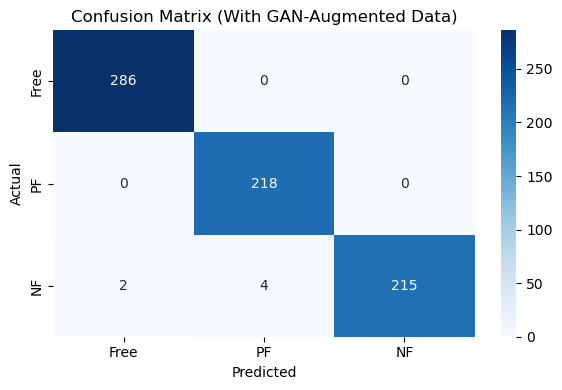

In [53]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=["Free", "PF", "NF"], yticklabels=["Free", "PF", "NF"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (With GAN-Augmented Data)")
plt.tight_layout()
plt.show()

In [55]:
# Calculate and print macro F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"\nMacro F1 Score: {f1:.4f}")


Macro F1 Score: 0.9912
